## Common measures of textual complexity are derived from simple counts of words, sentences and syllables. In this homework, you'll implement two of them: type-token ratio (a measure of vocabulary richness) and the Flesch-Kincaid Grade Level. {-}

#### <i>\color{red}Full source-code and data available at:</i> {-}

#### <a style="color:blue" href='https://github.com/rahwinside/term4_nlp_code_python'>\color{blue}https://github.com/rahwinside/term4_nlp_code_python</a> {-}
\color{black}

### Q1. Find two different speeches you'd like to compare by two different political leaders (from any source). For potential sources, speeches by prime ministers of India see https://eparlib.nic.in/handle/123456789/800962 (you can ignore question answers). You may choose speech by other member of parliament from the same source. Ensure that both texts are a minimum of 500 words. Write (Python) code to read these txt file. {-}

In [1]:
speech1_file = open("asst1_data1.txt")
speech1 = speech1_file.read()

# limiting to first 500 english words
speech1 = ' '.join(speech1.split()[:500])
speech1

'Madam Speaker, I convey my warm congratulations to you, the Members of this august House and the people of India on this momentous occasion of the 60th Anniversary of the first Session of our Parliament. Madam, the Lok Sabha is a true representation of the unique diversity and genius of the Indian people. Its Members have come from every region, community, religion and strata of society. Some of them have left their mark with their masterly rhetoric, others with their earthy wisdom. Whether from the Left or the Right, from the Government or Treasury Benches, this House has voiced the tribulations of ordinary Indians and provided succour to them by enacting laws that translated the social and economic ideals of our nation into practical reality. What the Constitution envisioned, Parliament translated into action. Madam, as we look back over these years, we feel a sense of quiet satisfaction that this august institution representing the will of the sovereign people has indeed lived up t

In [2]:
speech2_file = open("asst1_data2.txt")
speech2 = speech2_file.read()

# limiting to first 500 english words
speech2 = ' '.join(speech2.split()[:500])
speech2

"Madam Speaker, I would first like to express my gratitude to the President. Through the Presidential address, he has presented a detailed statement of India's glory, dignity, good growth, the expectation of common man of India and the expectation of world to not only the houses but to the country and the world. I express my respectful thanks to him and stand to thank him. In this important discussion of the House, many respected members have extended the benefit of their experience and their thoughts to the House and the country. Respected Shri Mallikarjun Ji, Shri Venkaiah Naidu Ji, Meenakshi Lekhi Ji, Harsimrat Kaur Ji, Shri. P. Nagarajan Ji, Shri Saugata Roy, Shri Bhartruhari Mahtab Ji, Shri Jitender Reddy Ji, Mohammad Salim Ji, Supriya Sule Ji, Mulayam Singh Yadav Ji, Rahul Gandhi Ji, Anupriya Patel Ji, Shri. Rio Ji, Shri. Owaisi Ji and many senior respected dignitaries have placed their opinion. I say thanks to all of them because they have contributed towards empowering the peop

### Q2. Use atleast two different word tokenizers to calculate type-token ratio. {-}
\begin{equation}
TTR = \frac{number of distinct word types}{number of tokens}\end{equation}

In [3]:
# define ttr function
def ttr(tokens):
    types = set(tokens) # it's a set! no duplicates, right?
    return len(types)/len(tokens)

In [4]:
# Punctuation-based tokenization (contains exclusive punctuation tokens)
from nltk.tokenize import wordpunct_tokenize
speech1_tokens_punct = wordpunct_tokenize(speech1)
speech2_tokens_punct = wordpunct_tokenize(speech2)
display("# of Tokens in Speech1: " + str(len(speech1_tokens_punct)))
display("# of Tokens in Speech2: " + str(len(speech2_tokens_punct)))

'# of Tokens in Speech1: 552'

'# of Tokens in Speech2: 566'

In [5]:
# Using Regexp Tokenizer to help in removing punctuations
from nltk.tokenize import RegexpTokenizer

regextokenizer = RegexpTokenizer(r'\w+') #\w+ matches one or more word characters (same as [a-zA-Z0-9_]+)
speech1_tokens_no_punct = regextokenizer.tokenize(speech1)
speech2_tokens_no_punct = regextokenizer.tokenize(speech2)
display("# of Tokens in Speech1: " + str(len(speech1_tokens_no_punct)))
display("# of Tokens in Speech2: " + str(len(speech2_tokens_no_punct)))

display("TTR(Speech 1): " + str("{:.2f}".format(ttr(speech1_tokens_no_punct[:500]))) + " (for first 500 words)") #limiting to first 500 words
display("TTR(Speech 2): " + str("{:.2f}".format(ttr(speech2_tokens_no_punct[:500]))) + " (for first 500 words)") #limiting to first 500 words

'# of Tokens in Speech1: 500'

'# of Tokens in Speech2: 503'

'TTR(Speech 1): 0.55 (for first 500 words)'

'TTR(Speech 2): 0.48 (for first 500 words)'

In [6]:
# Treebank Word tokenizer
from nltk.tokenize import TreebankWordTokenizer

tb_tokenizer = TreebankWordTokenizer()

speech1_tokens_tb = tb_tokenizer.tokenize(speech1)
speech2_tokens_tb = tb_tokenizer.tokenize(speech2)
display("Before removing punctuation- Speech1: " + str(len(speech1_tokens_tb)) + " Speech2: " + str(len(speech2_tokens_tb)))
# removing exclusive punctuation tokens (note that . are at the end of the word in a sentence break and is not filtered)
import re

pat = r'^\w+'
speech1_tokens_tb = [token for token in speech1_tokens_tb if re.search(pat, token)]
speech2_tokens_tb = [token for token in speech2_tokens_tb if re.search(pat, token)]
display("After removing punctuation- Speech1: " + str(len(speech1_tokens_tb)) + " Speech2: " + str(len(speech2_tokens_tb)))

display("TTR(Speech 1): " + str("{:.2f}".format(ttr(speech1_tokens_tb[:500]))) + " (for first 500 words)") #limiting to first 500 words
display("TTR(Speech 2): " + str("{:.2f}".format(ttr(speech2_tokens_tb[:500]))) + " (for first 500 words)") #limiting to first 500 words

'Before removing punctuation- Speech1: 533 Speech2: 530'

'After removing punctuation- Speech1: 500 Speech2: 499'

'TTR(Speech 1): 0.56 (for first 500 words)'

'TTR(Speech 2): 0.51 (for first 500 words)'

### Q3. TTR is dependent on text length (intuitively, the longer a text is, the greater chance you have of a word type repeating), so this number is only comparable between documents of identical lengths. Plot TTR for different number of words, do you think that TTR converges with number of words.  {-}

In [7]:
# generate data points to plot
def get_datapoints(tokens):
    x = []
    y = []
    for i in range(1, len(tokens)):
        x.append(i)
        y.append(ttr(tokens[:i]))
    return x, y

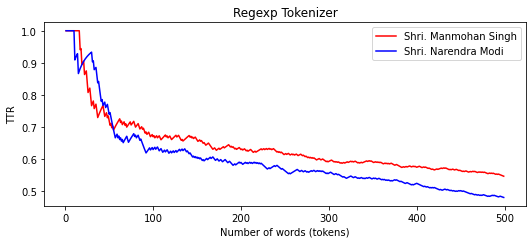

In [8]:
x1, y1 = get_datapoints(speech1_tokens_no_punct[:500])
x2, y2 = get_datapoints(speech2_tokens_no_punct[:500])

# Let's write that beauuuuuuutiful code to plot!
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.plot(x1, y1, color='red', label='Shri. Manmohan Singh')
plt.plot(x2, y2, color='blue', label='Shri. Narendra Modi')

plt.xlabel("Number of words (tokens)")
plt.ylabel("TTR")

plt.title("Regexp Tokenizer")

plt.legend(loc="upper right")

plt.show()

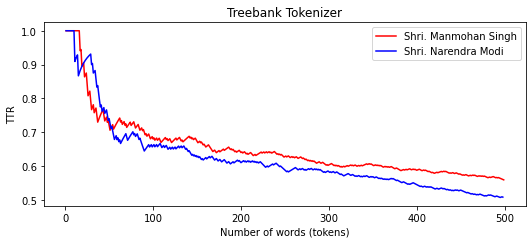

In [9]:
x1, y1 = get_datapoints(speech1_tokens_tb[:500])
x2, y2 = get_datapoints(speech2_tokens_tb[:500])

import numpy as np
from matplotlib import pyplot as plt

plt.plot(x1, y1, color='red', label='Shri. Manmohan Singh')
plt.plot(x2, y2, color='blue', label='Shri. Narendra Modi')

plt.xlabel("Number of words (tokens)")
plt.ylabel("TTR")

plt.title("Treebank Tokenizer")

plt.legend(loc="upper right")

plt.show()


#### \color{green}TTR appears to converge to 0 as the number of words increases.
\color{black}

### Q4. Now we will implement the Flesch-Kincaid Grade Level, which has the following formula:  {-}
\begin{equation}
0.39 \left ( \frac{\mbox{total words}}{\mbox{total sentences}} \right ) + 11.8 \left ( \frac{\mbox{total syllables}}{\mbox{total words}} \right ) - 15.59
\end{equation}

#### Note: We're limiting to first 500 words only!

In [10]:
def flesch_kincaid(words, sentences, syllables):
    return 0.39*(words/sentences) + 11.8*(syllables/words) - 15.59

In [12]:
# obtain total# of sentences using sentence tokenizer
from nltk.tokenize import sent_tokenize
import itertools

speech1_sent_token = len(sent_tokenize(speech1, language='english'))
speech2_sent_token = len(sent_tokenize(speech2, language='english'))

# total words
total_words = 500 #setting by default (we're selecting the first 500 words only, done in the first block)

# syllables#
# WARN: untested with numbers!
# NOTE: Not treating punctuations as syllables
from nltk.tokenize import SyllableTokenizer
syllable_tokenizer = SyllableTokenizer()

speech1_syllables = [syllable_tokenizer.tokenize(token) for token in speech1_tokens_no_punct] # syllable-tokenizing word by word!
speech2_syllables = [syllable_tokenizer.tokenize(token) for token in speech1_tokens_no_punct]

speech1_syllables_count = len(list(itertools.chain(*speech1_syllables)))
speech2_syllables_count = len(list(itertools.chain(*speech2_syllables)))

display("Flesch-Kincaid Grade - Speech1: " + str("{:.2f}".format(flesch_kincaid(total_words, speech1_sent_token, speech1_syllables_count))))
display("Flesch-Kincaid Grade - Speech2: " + str("{:.2f}".format(flesch_kincaid(total_words, speech2_sent_token, speech2_syllables_count))))

'Flesch-Kincaid Grade - Speech1: 16.08'

'Flesch-Kincaid Grade - Speech2: 12.43'